<a href="https://colab.research.google.com/github/heuretes4future/Machine_learning/blob/main/Labs/Lab1/Exercise_1_numpy_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy and Pytorch

Welcome to your first assignment. This exercise gives you a brief introduction to numpy and pytorch

**Instructions:**
- You will be using Python 3.
- After coding your function, run the cell right below it to check if your result is correct.

Let's get started!

**Exercise**: Set test to the `"Hello World"` and print it in the cell below.

In [5]:
### START CODE HERE ###
test = "Hello world this is a new file"
print(test)
### END CODE HERE ###

Hello world this is a new file


**Expected output**:
test: Hello World

## 1 - Building basic functions with numpy and pytorch ##

In this exercise you will learn several key numpy and pytorch functions such as np.exp, torch.exp, np.log. torch.log, and np.reshape, torch.reshape and torch,view. You will need to know how to use these functions for future assignments.

### 1.1 - sigmoid function, np.exp() , torch.exp()###


**Exercise**: Build a function that returns the sigmoid of a real number x.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function.

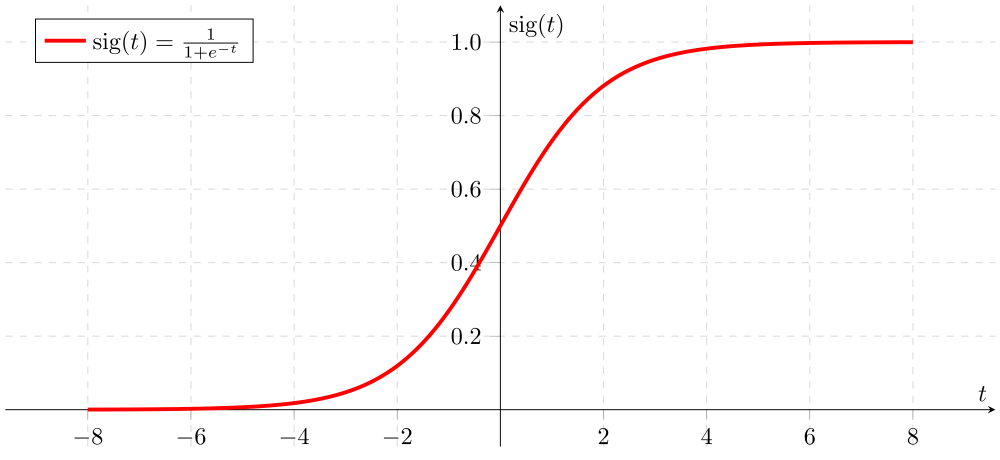


In [6]:
import numpy as np

def basic_sigmoid_numpy(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-x))
    ### END CODE HERE ###

    return s

**Important** The input of all functions in the pytorch should be a tensor use torch.tensor() to convert the values and array to tensor.

In [8]:
import torch

def basic_sigmoid_torch(x):
    """
    Compute sigmoid of x in pytorch.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """

    ### START CODE HERE ###
    # conver x to tensor
    x = torch.tensor(x)
    s = torch.sigmoid(x)
    ### END CODE HERE ###

    return s

In [ ]:
basic_sigmoid_numpy(3)

np.float64(0.9525741268224334)

**Expected Result = 0.9525741268224334**

In [ ]:
basic_sigmoid_torch(3)

tensor(0.9526)

**Expected Result= tensor(0.9526)**

Also, in Pytorch you can load some predefined functions from torch.nn.functional.  Following cell load sigmoid function and get the output with this predefined function.

In [ ]:
from torch.nn.functional import sigmoid
print(sigmoid(torch.tensor(3.0)))

tensor(0.9526)


You can easily use the sigmoid functoin implimented in pytorch

**Compute Sigmoid Function on a array**

**Exercise**: Create an array such as [1,2,3] in numpy and compute the sigmoid function on it using basic_sigmoid_numpy() and basic_sigmoid_torch() which we defined before and then print the results returned from both the functions. This will show how you can apply a function on a numpy array.

In [ ]:
### START CODE HERE ###
x = np.array([1,2,3])                           # Initialize x
print(basic_sigmoid_numpy (x)) # Sigmoid in numpy already calculated for you
                               # Do the same for torch
### END CODE HERE ###

**Expected Output**: [0.73105858 0.88079708 0.95257413]

tensor([0.7311, 0.8808, 0.9526])

### 1.2 - Sigmoid gradient

As you've seen in lecture, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [ ]:
def sigmoid_derivative_numpy(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """

    ### START CODE HERE ###
    s = basic_sigmoid_numpy(x)
    ds = s*(1-s)
    ### END CODE HERE ###

    return ds

**use torch.autograd.grad to compute the gradient in pytorch**

You need to review the pytorch website for computing gradient of a vector with respect to another vector.

**Hint**: use torch.ones_like() function in autograd for making the shape of the output of torch.autograd.grad function the same as the input s.

In [ ]:
def sigmoid_derivative_torch(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.

    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """

    ### START CODE HERE ###
    # conver numpy array to torch tensor meanwhile converting its type to float and set requires_grad argumnet to True for the tensor
    x = torch.tensor(x, dtype=torch.float32, requires_grad=True)
    # compute sigmoid function
    s = torch.sigmoid(x)
    # use autograd to compute the gradient
    ds = torch.autograd.grad(inputs=x, outputs=s, grad_outputs=torch.ones_like(x))
    ### END CODE HERE ###

    return ds

In [ ]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative_numpy(x)))
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative_torch(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]
sigmoid_derivative(x) = (tensor([0.1966, 0.1050, 0.0452]),)


**Expected Output**:


<table>
    <tr>
        <td> **sigmoid_derivative([1,2,3])**</td>
        <td> [ 0.19661193  0.10499359  0.04517666] </td>
    </tr>
</table>



### 1.3 - Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html).
- X.shape is used to get the shape (dimension) of a matrix/vector X.
- X.reshape(...) is used to reshape X into some other dimension.

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

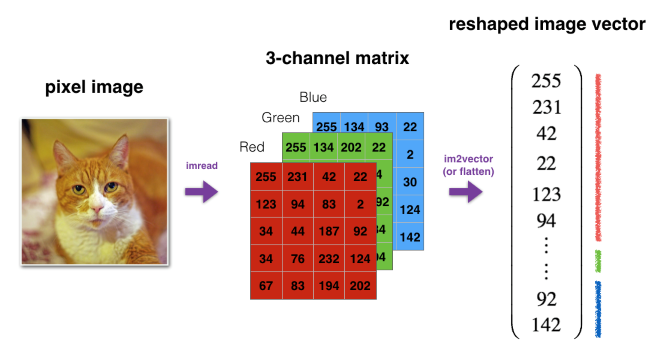

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc.

In [ ]:
# GRADED FUNCTION: image2vector
def image2vector_numpy(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)

    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2], 1))
    ### END CODE HERE ###

    return v

**use torch.view() function to reshape the input image**

In [10]:
# GRADED FUNCTION: image2vector
def image2vector_torch(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)

    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """

    ### START CODE HERE ###
    # convert numpy array to torch.tensor
    image = torch.tensor(image)

    # use torch.view to reshape
    v = image.view(-1, 1)
    ### END CODE HERE ###

    return v

In [11]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector_numpy(image)))
print ("image2vector(image) = " + str(image2vector_torch(image)))

NameError: name 'image2vector_numpy' is not defined

**Expected Output**:


<table style="width:100%">
     <tr>
       <td> **image2vector(image)** </td>
       <td> [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]</td>
     </tr>
    
   
</table>

### 1.5 - Broadcasting and the softmax function ####
A very important concept to understand in numpy and pytorch is "broadcasting". It is very useful for performing mathematical operations between arrays of different shapes.

**Exercise**: Implement a softmax function using numpy.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}}
\end{bmatrix} $

for a matrix  $x \in \mathbb{R}^{m \times n}$ ,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have:  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [1]:
# GRADED FUNCTION: softmax

def softmax_numpy(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (n, m).

    Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (n,m)
    """

    ### START CODE HERE ###
    # Apply exp() element-wise to x. Use np.exp(...).
    x_exp = np.exp(x)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1, keepdims = True)

    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp/x_sum

    ### END CODE HERE ###

    return s

**Import softmax function from torch.nn.functional and compute the softmax**

In [13]:
# import softmax function
### START CODE HERE ###
from torch.nn.functional import softmax

x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
# convert numpy array to torch tensor
x = torch.tensor(x, dtype=torch.float32)
# compute the softmax function
s = torch.nn.functional.softmax(x, dim =-1)

print(s)
### END CODE HERE ###

tensor([[9.8090e-01, 8.9446e-04, 1.7966e-02, 1.2105e-04, 1.2105e-04],
        [8.7868e-01, 1.1892e-01, 8.0125e-04, 8.0125e-04, 8.0125e-04]])


In [15]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax_numpy(x)))

softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


### 2.1 Implement the L1 and L2 loss functions

**Exercise**: Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \frac{1}{m}\sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [16]:
# GRADED FUNCTION: L1

def L1_numpy(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L1 loss function defined above
    """

    ### START CODE HERE ### (≈ 1 line of code)
    loss = (1/len(y))*sum(abs(yhat - y))
    ### END CODE HERE ###

    return loss

**Import l1_loss from torch.nn.functional to compute l1-loss in torch**

In [17]:
### START CODE HERE ###
from torch.nn.functional import l1_loss
### END CODE HERE ###
def L1_pytorch(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L1 loss function defined above
    """

    ### START CODE HERE ###
    # conver y and yhat to torch.tensor
    y = torch.tensor(y)
    yhat = torch.tensor(yhat)
    loss = torch.nn.functional.l1_loss(yhat, y, reduction='mean')
    ### END CODE HERE ###

    return loss

In [18]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1_numpy(yhat,y)))
print("L1 = " + str(L1_pytorch(yhat,y)))

L1 = 0.22000000000000003
L1 = tensor(0.2200, dtype=torch.float64)


**Exercise**: Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if $x = [x_1, x_2, ..., x_n]$, then `np.dot(x,x)` = $\sum_{j=0}^n x_j^{2}$.

- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \frac{1}{m}\sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [23]:
# GRADED FUNCTION: L2

def L2_numpy(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L2 loss function defined above
    """

    ### START CODE HERE ### (≈ 1 line of code)
    loss =  (1/len(y))*sum(abs(yhat - y)**2)
    ### END CODE HERE ###

    return loss

**Import mse_loss from torch.nn.functional to compute loss in torch**

In [21]:
# GRADED FUNCTION: L2
### START CODE HERE ###
from torch.nn.functional import mse_loss
### END CODE HERE ###
def L2_pytorch(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)

    Returns:
    loss -- the value of the L2 loss function defined above
    """

    ### START CODE HERE ###
    # conver y and yhat to torch.tensor
    y = torch.tensor(y)
    yhat = torch.tensor(yhat)
    loss = torch.nn.functional.mse_loss(yhat, y, reduction='mean')
    ### END CODE HERE ###

    return loss

In [24]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2_numpy(yhat,y)))
print("L2 = " + str(L2_pytorch(yhat,y)))

L2 = 0.08600000000000001
L2 = tensor(0.0860, dtype=torch.float64)


# Datasets in Torch

 We have datasets available in pytorch so that you can quickly start experimenting with them. Here we have simple datasets already provided in pytorch called MNIST and Fashion MNIST. We have load the MNIST dataset and plotted some data and class labels for you to observe

In [25]:
# import packages
import torch
from torch.utils.data import Dataset # to create dataset object
from torchvision import datasets # to load predefined dataset in torch
from torchvision.transforms import ToTensor # convert PIL image to tensors
import matplotlib.pyplot as plt # plot images

**Create training and testing data**

In [ ]:
training_set1 = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

training_set2 = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.66MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.54MB/s]
100%|██████████| 26.4M/26.4M [00:01<00:00, 16.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]

**Visualize Data**

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_set1), size=(1,)).item()
    img, label = training_set1[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**Quiz Task 1: Similar to the above plot, please plot the the images in the training_set2 so that you can observe the images in the FashionMNIST dataset**

In [ ]:
### Start Code here








### End code here


**Quiz Task 2: In this lab you have learnt to convert an array of any shape like (H,W,C) into a vector of shape (H\*W\*C,1). Please take any single image from the MNIST dataset (Training_set1), print its shape and comment on it and then convert the same image into a vector form in the cells given below:**

In [ ]:
### Take an image from the training_set2
### Start Code here



### End code here



### Print shape of the image

### Start Code here



### End code here


###Please answer the following questions:

###1) how is the shape of these images different than the normal images of shapes (H,W,3)?

###2) How many channels would you say these images have?

###3) How would you vectorize these images?

In [ ]:
### Convert the image into a vector
### Start code here



### End code here


### Print the shape of the vector
### Start Code here



### End code here


### Now you have an image in a vectorized format. In this format we say that each element of this vector is a "Feature" of the original image. Since the shape of the original image is (28,28), then when we vectorize this image we will get a vector of size (28*28,1) or (784,1)

### In Deep Learning when we intend to work on such a type of vector data we use a type of basic networks called linear neural networks.



### Question: If we have linear neural network with only one layer with a single neuron in it and sigmoid as an activation function, then if we are using the MNIST dataset and vectorize its images, how many weight elements or parameters would the single unit contain?

### Your Answer: